In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from functools import reduce

print("Libraries Loaded")

Libraries Loaded


In [3]:
subways = pd.read_csv('NYC_subwaylines.csv')
airbnb = pd.read_csv('airbnb_listings.csv')
attractions = pd.read_csv('NYC_attractions.csv')

print("Dataframes Loaded, proceed")

Dataframes Loaded, proceed


In [4]:
airbnb.latitude.astype(str)

0        40.64749000000001
1                 40.75362
2                 40.80902
3                 40.68514
4                 40.79851
               ...        
48890             40.67853
48891             40.70184
48892             40.81475
48893             40.75751
48894             40.76404
Name: latitude, Length: 48895, dtype: object

In [5]:
subways.latitude.astype(str)

0      40.660396999999996
1      40.660396999999996
2               40.655144
3               40.655144
4               40.655144
              ...        
995             40.680429
996             40.680429
997             40.680429
998              40.71047
999              40.71047
Name: latitude, Length: 1000, dtype: object

In [6]:
attractions.latitude.astype(str)

0      40.757
1     40.7527
2      40.759
3     40.7586
4     40.7538
5     40.6616
6     40.7061
7      40.748
8     40.5738
9     40.7116
10    40.7794
11    40.5861
12    40.7805
13    40.6941
14    40.7483
15    40.7113
16    40.7616
17     40.713
18    40.7822
Name: latitude, dtype: object

In [7]:
# converting df to sql tables

# connect to database
conn = sqlite3.connect('nyc.sqlite')
cur = conn.cursor()
print('Database created.')

# load dataframes into database
subways.to_sql("transportation", conn)
airbnb.to_sql('airbnb',conn)
attractions.to_sql('attractions',conn)

print('Tables Created.')

Database created.


C:\Users\jfrui\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


Tables Created.


In [8]:
conn.close()
print('Connection closed.')

Connection closed.


In [68]:
# Creating the connection to database
con = sqlite3.connect('nyc.sqlite')
cursor = con.cursor()

In [4]:
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('transportation',)
('airbnb',)
('attractions',)


In [5]:
# looking at airbnb locations by borough
neighborhoods = pd.read_sql("""SELECT *
                        FROM airbnb
                        ORDER BY borough;""", con)
neighborhoods

,index,Unnamed: 0,property_id,description,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,days_available
0,171,171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
1,207,207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
2,260,260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,7,349
3,261,261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,0.50,13,365
4,309,309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,48441,48441,36267546,A Home Away From Home,233485864,Jeannie,Staten Island,New Dorp Beach,40.56506,-74.10240,Private room,40,1,0,NaN,2,341
48891,48446,48446,36270376,"Beautiful home on Staten Island, walk to ferry",444904,Janine,Staten Island,St. George,40.64005,-74.07987,Entire home/apt,100,365,0,NaN,1,342
48892,48533,48533,36310353,Staten Island Resort minutes from ferry! Amazi...,28586423,Danielle,Staten Island,Stapleton,40.62878,-74.07301,Entire home/apt,450,5,0,NaN,1,88
48893,48649,48649,36355110,PRIVATE ROOM IN STATEN ISLAND -FOR LADIES ONLY,201187671,Tuana,Staten Island,Shore Acres,40.61283,-74.06625,Private room,54,4,0,NaN,1,89


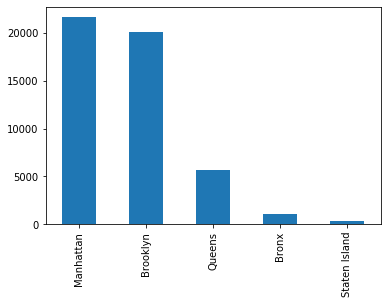

In [14]:
neighborhoods['borough'].value_counts().plot.bar()

In [9]:
# looking at airbnb locations by borough
visitors = pd.read_sql("""SELECT *
                        FROM attractions
                        ORDER BY name;""", con)
visitors

,index,Unnamed: 0,Name,Location,Estimated Number of Visitors (millions),Year of Last Visitor Calculation,latitude,longitude
0,12,12,American Museum of Natural History,"between Columbus Ave, Central Park W, and W 77...",5.0,2018,40.7805,-73.9747
1,4,4,Bryant Park,"between 5th and 6th Aves, between W 40th and W...",12.0,2017,40.7538,-73.9838
2,18,18,Central Park,"between 5th and 8th Aves, between W 59th and W...",42.0,2016,40.7822,-73.9652
3,8,8,Coney Island (including amusement parks and bo...,southern shore of Brooklyn40°34′26″N 73°58′41″...,7.4,2017,40.5738,-73.9780
4,14,14,Empire State Building,5th Ave and W 34th St40°44′54″N 73°59′08″W﻿ / ...,4.0,2015,40.7483,-73.9855
5,1,1,Grand Central Terminal,Park Ave between E 42nd and E 45th Sts40°45′10...,21.6,2014,40.7527,-73.9772
6,7,7,High Line,west of 10th Ave between Gansevoort and W 34th...,7.6,2015,40.7480,-74.0033
7,10,10,Metropolitan Museum of Art,5th Ave and E 82nd St40°46′46″N 73°57′47″W﻿ / ...,6.1,2014,40.7794,-73.9630
8,16,16,Museum of Modern Art,11 W 53rd St40°45′42″N 73°58′39″W﻿ / ﻿40.7616°...,2.8,2016,40.7616,-73.9775
9,9,9,National September 11 Memorial,"between West, Vesey, Greenwich, and Liberty St...",6.8,2017,40.7116,-74.0136


Text(0.5, 1.0, 'Annual Visitors per NYC Attraction')

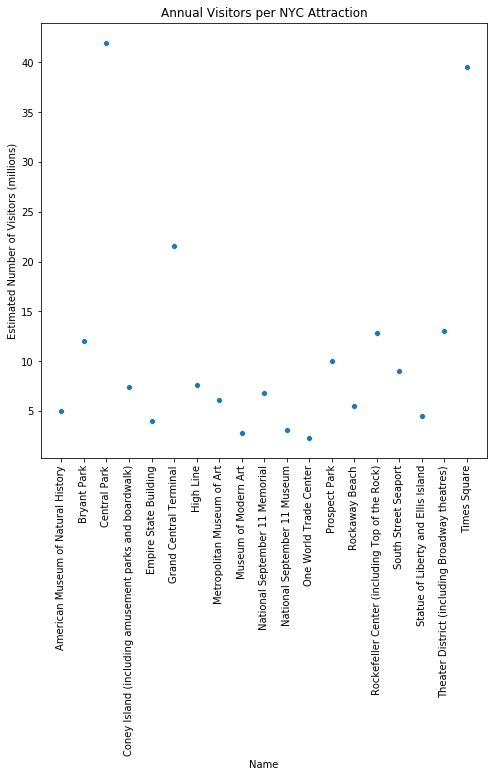

In [19]:
import seaborn as sns
plt.figure(figsize = (8,8))
ax = sns.scatterplot(x = 'Name', y = 'Estimated Number of Visitors (millions)', data=visitors)

plt.xticks(rotation=90)
plt.title("Annual Visitors per NYC Attraction")

In [20]:
# looking at subways stations by location
subway = pd.read_sql("""SELECT *
                        FROM transportation
                        ORDER BY line;""", con)
subway

,index,Unnamed: 0,division,line,station_name,latitude,longitude,route1,entrance_type,entry,...,route4,route5,route6,route7,route8,route9,ada_notes,staff_hours,route10,route11
0,0,0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
1,1,1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
2,2,2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
3,3,3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
4,4,4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,437,437,BMT,West End,Bay Parkway,40.601875,-73.993728,D,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
996,438,438,BMT,West End,Fort Hamilton Parkway,40.640914,-73.994304,D,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
997,439,439,BMT,West End,Fort Hamilton Parkway,40.640914,-73.994304,D,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN
998,440,440,BMT,West End,Fort Hamilton Parkway,40.640914,-73.994304,D,Stair,YES,...,None,None,None,None,NaN,NaN,None,None,NaN,NaN


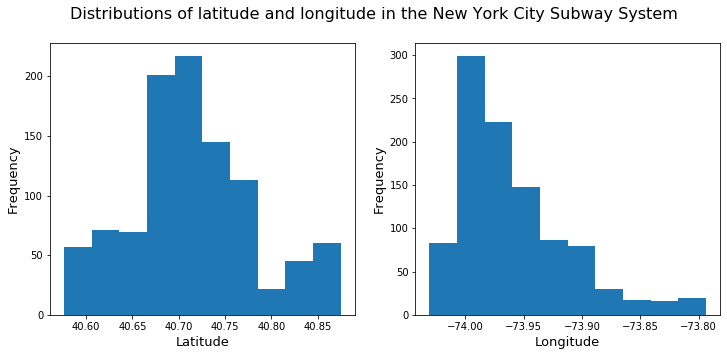

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distributions of latitude and longitude in the New York City Subway System", fontsize=16)
ax1.hist(subway.latitude)
ax1.set_xlabel("Latitude", fontsize=13)
ax1.set_ylabel("Frequency", fontsize=13)
ax2.hist(subway.longitude)
ax2.set_xlabel("Longitude", fontsize=13)
ax2.set_ylabel("Frequency", fontsize=13);

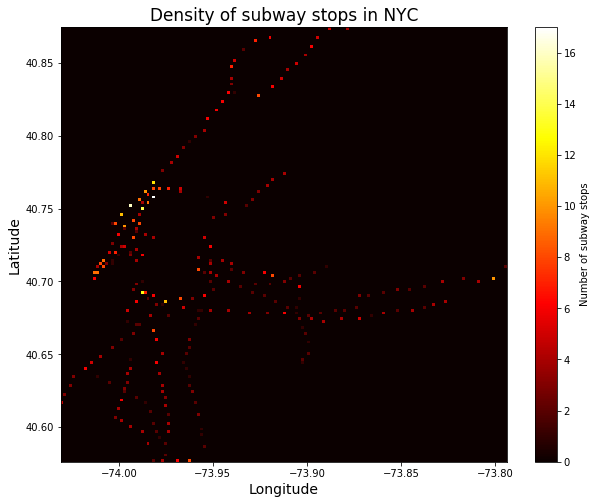

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.hist2d(subway.longitude, subway.latitude, bins=150, cmap = 'hot')
plt.colorbar().set_label("Number of subway stops")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Density of subway stops in NYC", fontsize=17)
plt.show()

In [36]:
con.close()
print('Connection closed.')

Connection closed.


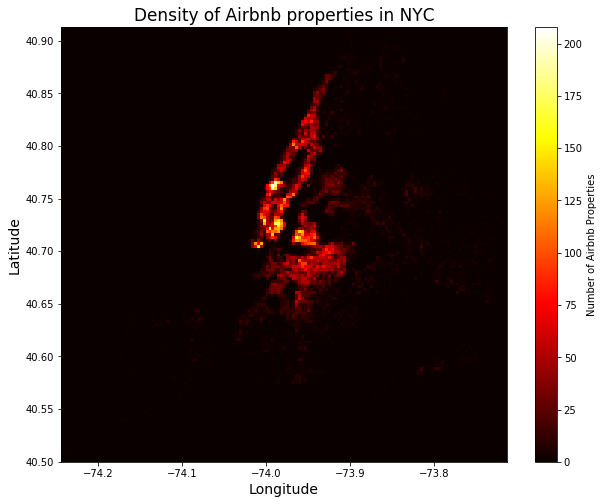

In [41]:
# Density of Airbnb properties based on longitude and latitude

plt.figure(figsize = (10,8))
plt.hist2d(neighborhoods.longitude, neighborhoods.latitude, bins=150, cmap = 'hot')
plt.colorbar().set_label("Number of Airbnb Properties")
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Density of Airbnb properties in NYC", fontsize=17)
plt.show()

In [59]:
columnnames = """ALTER TABLE transportation RENAME COLUMN latitude TO station_latitude;"""
columnnames2 = """ALTER TABLE transportation RENAME COLUMN longitude TO station_longitude;"""

cursor.execute(columnnames)
cursor.execute(columnnames2)
con.commit()

In [63]:
# looking at proximity of subway locations to airbnb locations
walking = pd.read_sql("""SELECT transportation.station_name, transportation.station_longitude, transportation.station_latitude, airbnb.latitude, airbnb.longitude
                        FROM transportation
                        CROSS JOIN airbnb
                        LIMIT 100000;""", con)
walking

,station_name,station_longitude,station_latitude,latitude,longitude
0,25th St,-73.998091,40.660397,40.64749,-73.97237
1,25th St,-73.998091,40.660397,40.75362,-73.98377
2,25th St,-73.998091,40.660397,40.80902,-73.94190
3,25th St,-73.998091,40.660397,40.68514,-73.95976
4,25th St,-73.998091,40.660397,40.79851,-73.94399
...,...,...,...,...,...
99995,36th St,-74.003549,40.655144,40.64871,-74.00774
99996,36th St,-74.003549,40.655144,40.74583,-74.00363
99997,36th St,-74.003549,40.655144,40.80938,-73.94196
99998,36th St,-74.003549,40.655144,40.65743,-73.96155


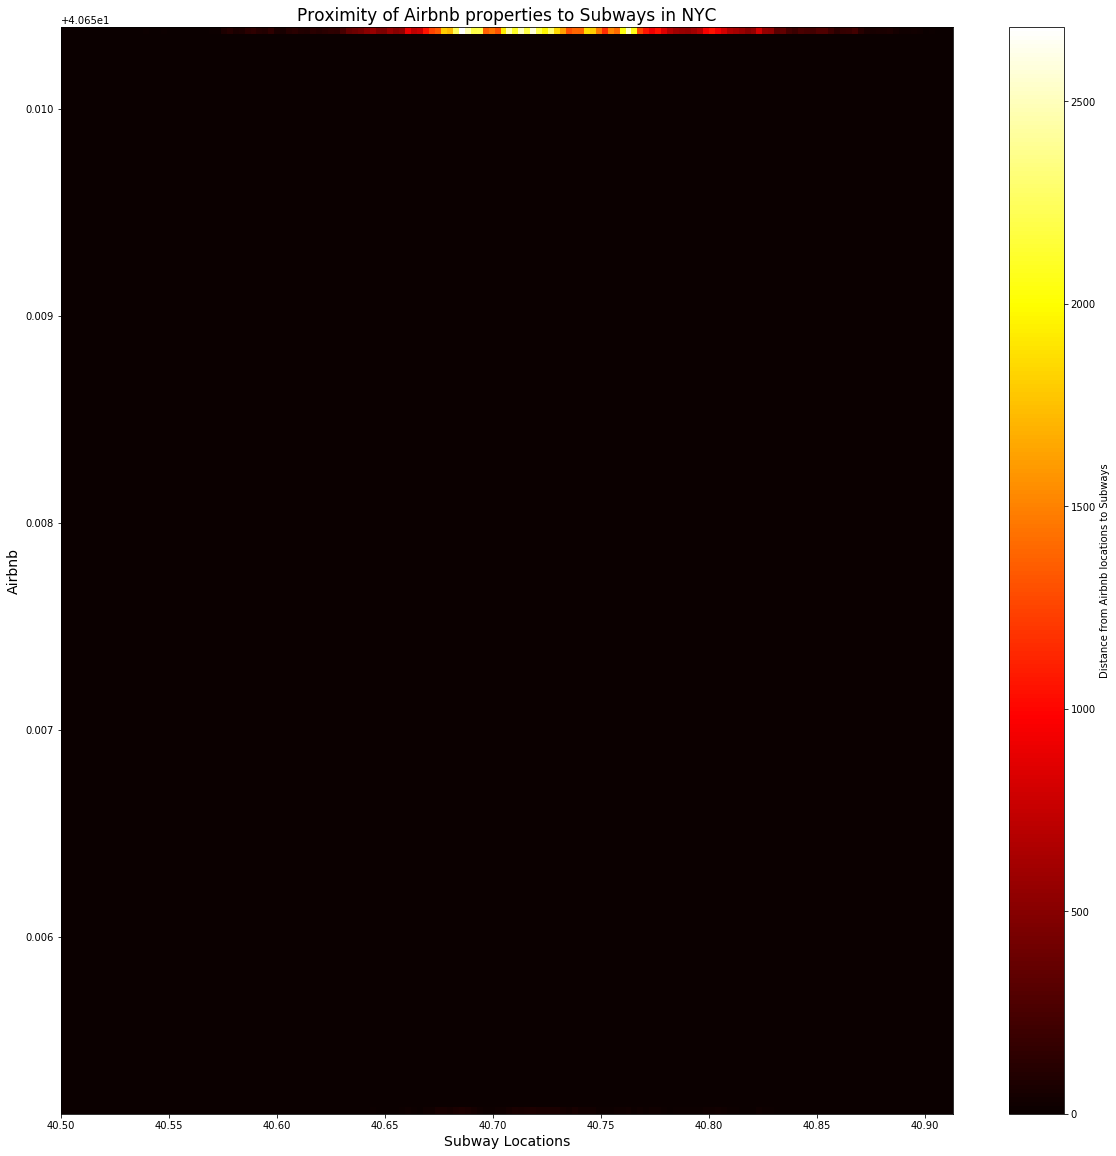

In [71]:
plt.figure(figsize = (20,20))
plt.hist2d(walking.latitude, walking.station_latitude, bins=150, cmap = 'hot')
plt.colorbar().set_label("Distance from Airbnb locations to Subways")
plt.xlabel("Subway Locations", fontsize=14)
plt.ylabel("Airbnb", fontsize=14)
plt.title("Proximity of Airbnb properties to Subways in NYC", fontsize=17)
plt.show()

In [67]:
con.close()
print('Connection closed.')

Connection closed.


In [69]:
transportation_table = pd.read_sql_query("SELECT * FROM transportation", con)
airbnb_table = pd.read_sql_query("SELECT * FROM airbnb", con)
attractions_table = pd.read_sql_query("SELECT * FROM attractions", con)

<function matplotlib.pyplot.show(*args, **kw)>

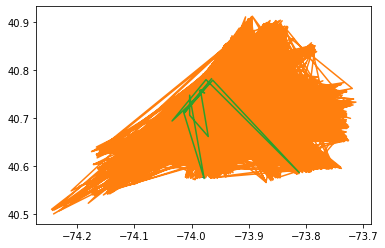

In [74]:
plt.plot(transportation_table['station_longitude'],transportation_table['station_latitude'])
plt.plot(airbnb_table['longitude'],airbnb_table['latitude'])
plt.plot(attractions_table['longitude'],attractions_table['latitude'])


plt.show

The final project for this course focused on building knowledge and skills working with several different data sources and advancing data cleaning knowledge. To complete this project, several milestones were needed. I began by researching and selecting potential data sources for the project, including a flat file, a web file suitable for web scraping, and an API with appropriate data.
After data selection, I began data exploration for each data type. This included replacing missing values, cleaning column names, creating new columns, and separating out datetime information. For Milestone 3, which dealt with the web scraping, I found that the source I had initially chosen was written in Javascript, not html, therefore could not be parsed through BeautifulSoup. This caused me to pivot to an alternative data source containing similar information. The other sources remained the same and I was able to effectively work with each.
The final step in the project was merging the data frames I previously created and loading them into a database. This was the easiest step in the process for me and where I began to understand how much I had learned during the semester. Creating the final visuals was also a great check of the knowledge gained up to this point. 
Through this project, I gained a wealth of information and new applications for the information I had learned. The most impactful lesson was the sheer amount of time needed to carefully analyze and clean data for future usage. I also advanced in my code writing abilities and understanding of how components work together to achieve a result. This project also taught me that StackOverflow is sometimes the best resource you can have when coding. Overall, this project taught me greater patience and to think ahead when working with data. I found several times during the project where I had to return to earlier steps because I had forgotten to transform the data in certain way. This project has made me a better programmer and a more astute data wrangler.
